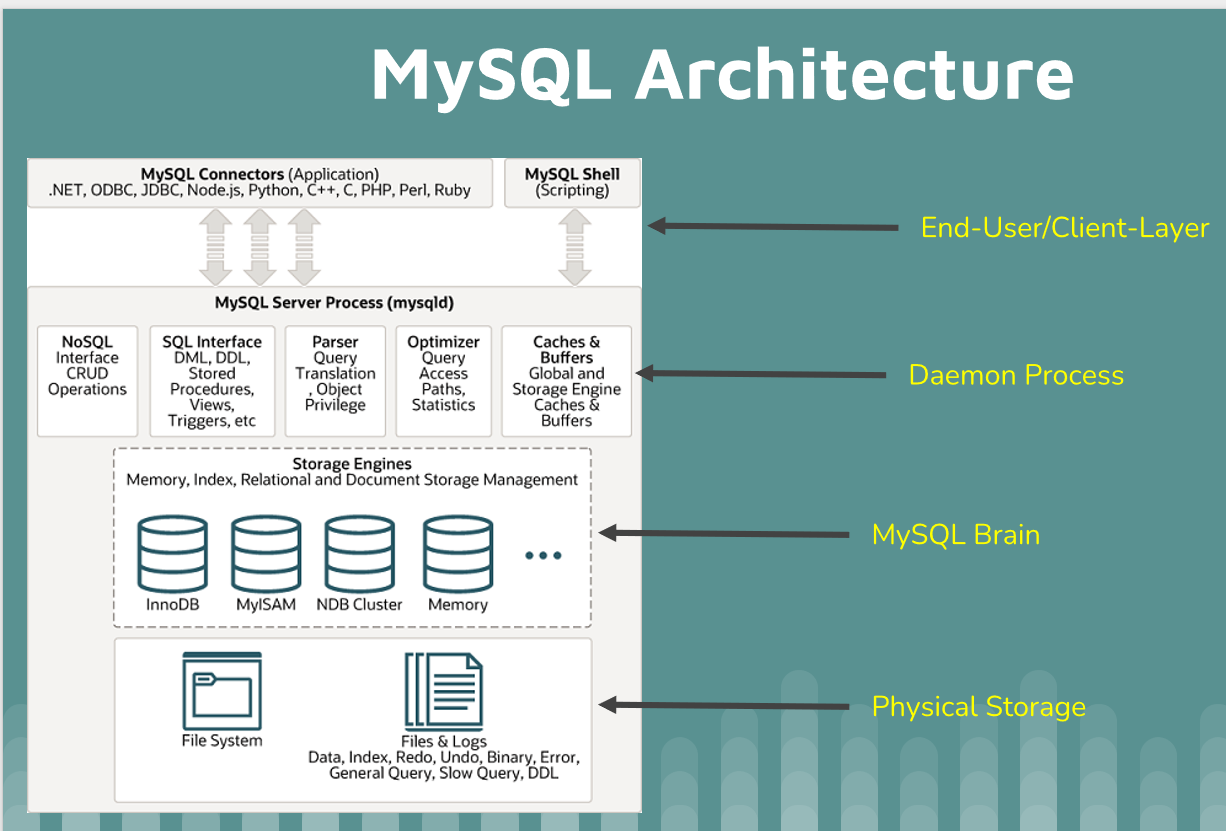

In [ ]:
MySQL File Types and Locations 
==========================================

Data directory -- all datafiles reside here with parameter datadir.
               -- default location is /var/lib/mysql.
               -- a folder is created for each database.
               -- owned by mysql user created during installation.

mysql> select @@datadir;
+-----------------+
| @@datadir       |
+-----------------+
| /var/lib/mysql/ |
+-----------------+

[root@mysqlserver Downloads]# ls -rtl /var/lib/mysql | grep drw
drwxr-x---. 2 mysql mysql     8192 May 14 15:48 performance_schema
drwxr-x---. 2 mysql mysql      143 May 14 15:48 mysql
drwxr-x---. 2 mysql mysql       28 May 14 15:48 sys
drwxr-x---. 2 mysql mysql      187 May 14 15:48 #innodb_temp
drwxr-x---. 2 mysql mysql     4096 May 14 15:48 #innodb_redo
[root@mysqlserver Downloads]# 


Log files -- logs all the errors , warnings and startup and shutdown messages.
          -- default location is /var/log/mysqld.log

[root@mysqlserver ~]# ls -rtl /var/log/mysqld.log 
-rw-r-----. 1 mysql mysql 1385 May 14 15:48 /var/log/mysqld.log
[root@mysqlserver ~]# 


Global configuration file  -- contains all the configuration settings which will be loaded at server startup.
                           -- default location is /etc/my.cnf.

[root@mysqlserver ~]# ls -rtl /etc/my.cnf
-rw-r--r--. 1 root root 1243 Jul  7  2022 /etc/my.cnf
[root@mysqlserver ~]# 

In [ ]:
mysql executable location 
===========================

[root@mysqlserver ~]# ls -rtl /usr/bin/mysql*
-rwxr-xr-x. 1 root root    7669 Jul  7  2022 /usr/bin/mysqldumpslow
-rwxr-xr-x. 1 root root    4368 Jul  7  2022 /usr/bin/mysqld_pre_systemd
-rwxr-xr-x. 1 root root    5018 Jul  7  2022 /usr/bin/mysql_config-64
-rwxr-xr-x. 1 root root     840 Jul  7  2022 /usr/bin/mysql_config
-rwxr-xr-x. 1 root root 7329512 Jul  7  2022 /usr/bin/mysqlcheck
-rwxr-xr-x. 1 root root 7326712 Jul  7  2022 /usr/bin/mysqlslap
-rwxr-xr-x. 1 root root 7615808 Jul  7  2022 /usr/bin/mysql

In [ ]:
MySql Shell Commands 
====================================


mysql> help  or  mysql> \h  ( list all commmands )

List of all MySQL commands:
Note that all text commands must be first on line and end with ';'
?         (\?) Synonym for `help'.
clear     (\c) Clear the current input statement.
connect   (\r) Reconnect to the server. Optional arguments are db and host.
delimiter (\d) Set statement delimiter.


mysql> connect  or  mysql> \r   ( reconnect )

Connection id:    15
Current database: *** NONE ***

mysql> connect sys
Reading table information for completion of table and column names
You can turn off this feature to get a quicker startup with -A

Connection id:    16
Current database: sys


Edit the previously executed Sql statement
=====================================================

mysql> select @@hostname , @version ;
+-------------+--------------------+
| @@hostname  | @version           |
+-------------+--------------------+
| mysqlserver | NULL               |
+-------------+--------------------+
1 row in set (0.00 sec)

mysql> edit
    -> ;
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)


mysql> prompt sysdb@mysql> 
PROMPT set to 'sysdb@mysql> '
sysdb@mysql> 
sysdb@mysql> select @@version;
+-----------+
| @@version |
+-----------+
| 8.0.30    |
+-----------+
1 row in set (0.00 sec)


Execute a system shell command ( system \! )
============================================================

sysdb@mysql> system vi script1.sql
sysdb@mysql> 

sysdb@mysql> \! pwd
/root

sysdb@mysql> \! ls -rtl
total 48
-rwxr-xr-x. 1 root root 36328 Feb 17 04:06 mariadb_repo_setup
-rw-------. 1 root root  1263 May 13 13:50 anaconda-ks.cfg
-rw-r--r--. 1 root root  1545 May 13 13:52 initial-setup-ks.cfg
-rw-r--r--. 1 root root    32 May 14 16:27 script1.sql
sysdb@mysql> 


Execute an SQL script file. Takes a file name as an argument ( source \.)
==============================================================================

sysdb@mysql> source script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)

sysdb@mysql> \. script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)



Set outfile [to_outfile]. Append everything into given outfile ( tee or \T )
===================================================================================

sysdb@mysql> \T outfile.txt
Logging to file 'outfile.txt'
sysdb@mysql> \. script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)

sysdb@mysql> source script1.sql
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlserver | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)

sysdb@mysql> select @@hostname;
+-------------+
| @@hostname  |
+-------------+
| mysqlserver |
+-------------+
1 row in set (0.00 sec)

sysdb@mysql> \T
Currently logging to file 'outfile.txt'
sysdb@mysql> \q


In [ ]:
MySql Socket File  ( mysql.sock )
===============================================

-- is a special file which manages connections to the mysql server.
-- used for local connections , without this local users can't connect to the mysql server.
-- default location is /var/lib/mysql.
-- Local connection = UNIX socket  - Remote connection = TCP/IP.


[root@mysqlserver ~]# ls -rtl /var/lib/mysql/mysql*.sock*
-rw-------. 1 mysql mysql 5 May 14 15:48 /var/lib/mysql/mysql.sock.lock
srwxrwxrwx. 1 mysql mysql 0 May 14 15:48 /var/lib/mysql/mysql.sock
[root@mysqlserver ~]# 

[root@mysqlserver ~]# cat /var/lib/mysql/mysql.sock
cat: /var/lib/mysql/mysql.sock: No such device or address
[root@mysqlserver ~]# 

[root@mysqlserver ~]# cat /var/lib/mysql/mysql.sock.lock
8137
[root@mysqlserver ~]# pidof mysqld
8137
[root@mysqlserver ~]# 


mysql> select user , host from mysql.user;
+------------------+-----------+
| user             | host      |
+------------------+-----------+
| db_admin         | %         |
| mysql.infoschema | localhost |
| mysql.session    | localhost |
| mysql.sys        | localhost |
| root             | localhost |
+------------------+-----------+
5 rows in set (0.00 sec)

mysql> show processlist;
+----+-----------------+---------------------+------+---------+------+------------------------+------------------+
| Id | User            | Host                | db   | Command | Time | State                  | Info             |
+----+-----------------+---------------------+------+---------+------+------------------------+------------------+
|  5 | event_scheduler | localhost           | NULL | Daemon  | 3812 | Waiting on empty queue | NULL             |
| 22 | db_admin        | 192.168.153.1:63777 | NULL | Sleep   |   45 |                        | NULL             |
| 23 | db_admin        | 192.168.153.1:63778 | NULL | Sleep   |   45 |                        | NULL             |
| 24 | root            | localhost           | NULL | Query   |    0 | init                   | show processlist |
+----+-----------------+---------------------+------+---------+------+------------------------+------------------+
4 rows in set (0.00 sec)


[root@mysqlserver ~]# rm -rf /var/lib/mysql/mysql.sock
[root@mysqlserver ~]# rm -rf /var/lib/mysql/mysql.sock.lock
[root@mysqlserver ~]# 


[root@mysqlserver ~]# mysql -u root -p
Enter password: 
ERROR 2002 (HY000): Can't connect to local MySQL server through socket '/var/lib/mysql/mysql.sock' (2)
[root@mysqlserver ~]# 


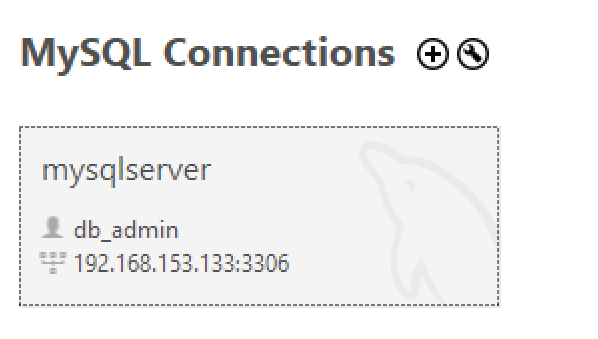

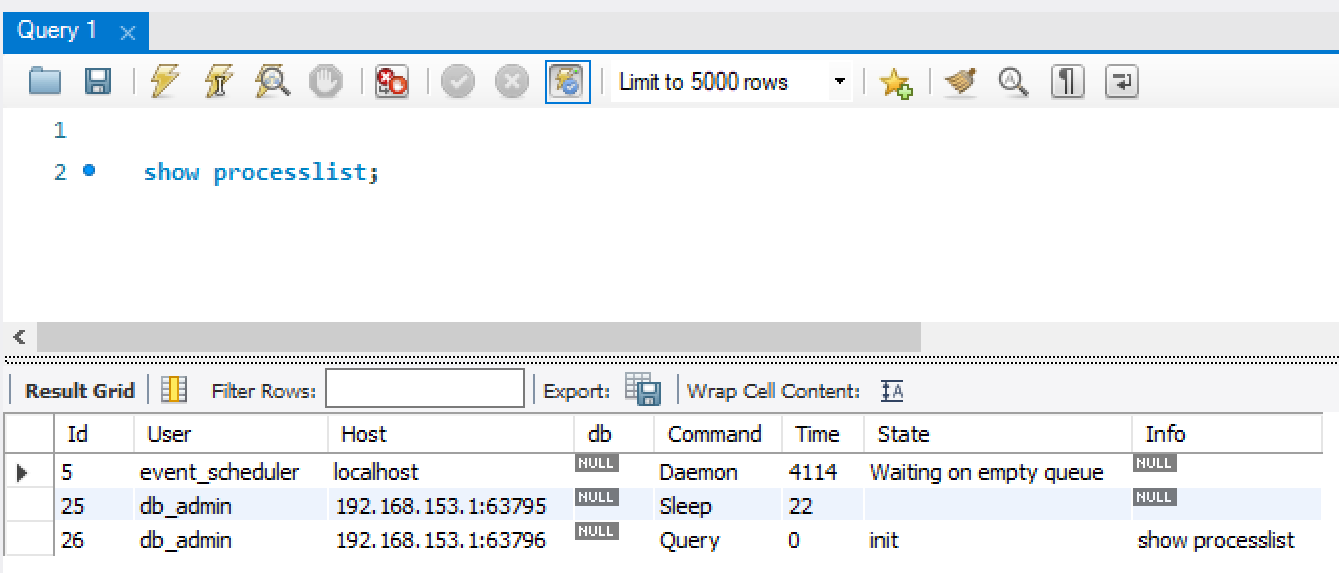

In [ ]:
[root@mysqlserver ~]# systemctl restart mysqld
[root@mysqlserver ~]# 
[root@mysqlserver ~]# ls -rtl /var/lib/mysql/mysql*.sock*
-rw-------. 1 mysql mysql 5 May 14 16:58 /var/lib/mysql/mysql.sock.lock
srwxrwxrwx. 1 mysql mysql 0 May 14 16:58 /var/lib/mysql/mysql.sock
[root@mysqlserver ~]# 
[root@mysqlserver ~]# mysql -u root -p
Enter password: 
Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 8
Server version: 8.0.30 MySQL Community Server - GPL

mysql> 

In [ ]:
MySQL Global and Session Variables 
==========================================

-- MySQL has system variables that control the operation of mysql.
-- system variables have global and session scope.
-- each global variable has a default value which is initialised during system startup.
-- default value can be changed via option file or command line.

mysql> select @@server_id;
+-------------+
| @@server_id |
+-------------+
|           1 |
+-------------+
1 row in set (0.00 sec)

mysql> select @@max_connections;
+-------------------+
| @@max_connections |
+-------------------+
|               151 |
+-------------------+
1 row in set (0.00 sec)

In [ ]:
MySQL system databases 
====================================

information_schema -- system catalog or data dictionary , tables in this are read-only.

mysql -- contains tables with user info , scheduler info , timezone info.

performance_schema -- contains performance data , wait events , database locks.

sys - contains info about the system , database host summary , io usage , memory usage.

mysql> select table_name , table_type , engine from tables where table_schema = 'information_schema';
+---------------------------------------+-------------+--------+
| TABLE_NAME                            | TABLE_TYPE  | ENGINE |
+---------------------------------------+-------------+--------+
| ADMINISTRABLE_ROLE_AUTHORIZATIONS     | SYSTEM VIEW | NULL   |
| APPLICABLE_ROLES                      | SYSTEM VIEW | NULL   |
| CHARACTER_SETS                        | SYSTEM VIEW | NULL   |
| CHECK_CONSTRAINTS                     | SYSTEM VIEW | NULL   |
| COLLATIONS                            | SYSTEM VIEW | NULL   |

mysql> select table_name , table_type , engine from tables where table_schema = 'mysql';
+------------------------------------------------------+------------+--------+
| TABLE_NAME                                           | TABLE_TYPE | ENGINE |
+------------------------------------------------------+------------+--------+
| columns_priv                                         | BASE TABLE | InnoDB |
| func                                                 | BASE TABLE | InnoDB |
| general_log                                          | BASE TABLE | CSV    |
| global_grants                                        | BASE TABLE | InnoDB |
| gtid_executed                                        | BASE TABLE | InnoDB |

mysql> select table_name , table_type , engine from tables where table_schema = 'performance_schema';
+------------------------------------------------------+------------+--------------------+
| TABLE_NAME                                           | TABLE_TYPE | ENGINE             |
+------------------------------------------------------+------------+--------------------+
| accounts                                             | BASE TABLE | PERFORMANCE_SCHEMA |
| binary_log_transaction_compression_stats             | BASE TABLE | PERFORMANCE_SCHEMA |
| cond_instances                                       | BASE TABLE | PERFORMANCE_SCHEMA |
| data_lock_waits                                      | BASE TABLE | PERFORMANCE_SCHEMA |

mysql> select table_name , table_type , engine from tables where table_schema = 'sys';
+-----------------------------------------------+------------+--------+
| TABLE_NAME                                    | TABLE_TYPE | ENGINE |
+-----------------------------------------------+------------+--------+
| host_summary                                  | VIEW       | NULL   |
| host_summary_by_file_io                       | VIEW       | NULL   |
| host_summary_by_file_io_type                  | VIEW       | NULL   |
| host_summary_by_stages                        | VIEW       | NULL   |


In [ ]:
MySQL Connections
==============================

localhost connections -- root@localhost , dba_user1@localhost .

specific host connections  -- posapp@192.168.56.72 , bosapp@bospbappserver1 .

any host connections -- db_admin@%

domain specific connections -- rapiapp@%.rapidapp.com 

mysql> select user , host from mysql.user;
+------------------+-----------+
| user             | host      |
+------------------+-----------+
| db_admin         | %         |
| mysql.infoschema | localhost |
| mysql.session    | localhost |
| mysql.sys        | localhost |
| root             | localhost |
+------------------+-----------+

mysql> select user , host , command from processlist;
+-----------------+---------------------+---------+
| user            | host                | command |
+-----------------+---------------------+---------+
| root            | localhost           | Query   |
| db_admin        | 192.168.153.1:61534 | Sleep   |
| db_admin        | 192.168.153.1:61535 | Sleep   |
| event_scheduler | localhost           | Daemon  |
+-----------------+---------------------+---------+

mysql> select user , host , command from processlist;
+-----------------+---------------------+---------+
| user            | host                | command |yyy
        ytt
+-----------------+---------------------+---------+
| db_admin        | 192.168.153.1:61534 | Sleep   |
| db_admin        | 192.168.153.1:61535 | Sleep   |
| db_admin        | localhost           | Query   |
| event_scheduler | localhost           | Daemon  |
+-----------------+---------------------+---------+